In [22]:
#important libraries for EDA

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,8)

In [23]:
config = {'BASE_PATH' : "data",
         'MODEL_PATH': "model"}

In [24]:
emp_df = pd.read_csv(f"{config['BASE_PATH']}/employee_data.csv") 

In [25]:
emp_df.head()

,employee_id,age,gender,marital_status,salary,employment_type,region,has_dependents,tenure_years,enrolled
0,10001,60,Female,Single,55122.97,Part-time,West,No,1.5,0
1,10002,50,Female,Single,89549.66,Full-time,West,Yes,12.8,1
2,10003,36,Male,Divorced,74145.66,Part-time,Midwest,No,3.8,0
3,10004,64,Female,Married,53877.83,Full-time,Northeast,No,3.3,0
4,10005,29,Male,Single,63404.63,Contract,Midwest,Yes,10.0,0


In [26]:
# Intial Inspection
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employee_id      10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   gender           10000 non-null  object 
 3   marital_status   10000 non-null  object 
 4   salary           10000 non-null  float64
 5   employment_type  10000 non-null  object 
 6   region           10000 non-null  object 
 7   has_dependents   10000 non-null  object 
 8   tenure_years     10000 non-null  float64
 9   enrolled         10000 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 781.4+ KB


## 🧮 Variable Classification

---

### 🔢 **Numerical Variables**
- `Age`
- `Salary`
- `Tenure Years`
- `Enrolled` *(Target Variable)*

These variables are continuous or count-based and are suitable for numerical analysis, correlation checks, and scaling if required for modeling.

---

### 🏷️ **Categorical Variables**
- `Gender`
- `Marital Status`
- `Employment Type`
- `Region`
- `Has Dependents`

These are qualitative features and will typically require **encoding** (e.g., One-Hot or Label Encoding) before use in most machine learning models.

---

### 🆔 **Note on Employee ID**
> *Employee ID is a unique identifier and holds no predictive power.*

- It does **not contribute** any meaningful information toward the target variable (`Enrolled`).
- It should be excluded from training to avoid **data leakage** or overfitting due to uniqueness.

---

> ✅ *Understanding variable types is crucial before performing preprocessing, feature engineering, and modeling.*


In [27]:
# Data Quality Checks

def dataQualityChecks(dataframe):

    print("Data Quality Check")
    print("-"*80)
    #check for Missing values
    print("\nMissing Values per column:")
    print(dataframe.isnull().sum())
    print("*"*50)

    #check for duplicates
    print("\nNumber of duplicate rows:", dataframe.duplicated().sum())
    print("*"*50)
    
    #check for impossible values
    print("\nAge range:", dataframe['age'].min(), "-", dataframe['age'].max())
    print("Salary range:", dataframe['salary'].min(), "-", dataframe['salary'].max())
    print("Tenure range:", dataframe['tenure_years'].min(), "-", dataframe['tenure_years'].max())


dataQualityChecks(emp_df)

Data Quality Check
--------------------------------------------------------------------------------

Missing Values per column:
employee_id        0
age                0
gender             0
marital_status     0
salary             0
employment_type    0
region             0
has_dependents     0
tenure_years       0
enrolled           0
dtype: int64
**************************************************

Number of duplicate rows: 0
**************************************************

Age range: 22 - 64
Salary range: 2207.79 - 120312.0
Tenure range: 0.0 - 36.0


In [28]:
# Descriptive Statistics

def descriptiveStatistics(dataframe):

    #Numerical Variables
    print("\nNumerical Variables Summary:")
    print("-"*80)
    print(dataframe[['age','salary','tenure_years']].describe())
    print("*"*80)

    #Categorical Variables
    print("\nCategorical Variable Summary:")
    for col in ['gender','marital_status','employment_type','region','has_dependents']:
        print(f"\n{col}")
        print(dataframe[col].value_counts(normalize=True))
        print("*"*50)

descriptiveStatistics(emp_df)


Numerical Variables Summary:
--------------------------------------------------------------------------------
              age         salary  tenure_years
count  10000.0000   10000.000000  10000.000000
mean      43.0020   65032.967907      3.967720
std       12.2858   14923.958446      3.895488
min       22.0000    2207.790000      0.000000
25%       33.0000   54714.342500      1.200000
50%       43.0000   65056.050000      2.800000
75%       54.0000   75053.687500      5.600000
max       64.0000  120312.000000     36.000000
********************************************************************************

Categorical Variable Summary:

gender
gender
Male      0.4815
Female    0.4810
Other     0.0375
Name: proportion, dtype: float64
**************************************************

marital_status
marital_status
Married     0.4589
Single      0.3877
Divorced    0.1001
Widowed     0.0533
Name: proportion, dtype: float64
**************************************************

employment_t

In [29]:
# Target Variable Analysis

def targetVariableAnalysis(dataframe):
    print("Target Variable Analysis")
    print("-"*80)
    print("\nOverall enrollment rate:", dataframe['enrolled'].mean())
    print("*"*50)

    for col in ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']:
        print(f"\nEnrollment rate by {col}:")
        print(dataframe.groupby(col)['enrolled'].mean())
        print("*"*50)


targetVariableAnalysis(emp_df)

Target Variable Analysis
--------------------------------------------------------------------------------

Overall enrollment rate: 0.6174
**************************************************

Enrollment rate by gender:
gender
Female    0.616008
Male      0.616822
Other     0.642667
Name: enrolled, dtype: float64
**************************************************

Enrollment rate by marital_status:
marital_status
Divorced    0.600400
Married     0.610155
Single      0.629353
Widowed     0.624765
Name: enrolled, dtype: float64
**************************************************

Enrollment rate by employment_type:
employment_type
Contract     0.312373
Full-time    0.753302
Part-time    0.284845
Name: enrolled, dtype: float64
**************************************************

Enrollment rate by region:
region
Midwest      0.617363
Northeast    0.611732
South        0.628300
West         0.612703
Name: enrolled, dtype: float64
**************************************************

Enrollment r

## 🎯 Target Variable Analysis

From the analysis above, we explore how the enrollment rate (`enrolled` = 1) varies across different groups:

---

### ✅ **Overall Enrollment Rate**
> **61.74%** of users enrolled in the insurance program.

---

### 👤 **Enrollment by Gender**

| Gender | Enrollment Rate |
|--------|------------------|
| Female | 61.60% |
| Male   | 61.68% |
| Other  | 64.27% |

- 🔍 *Insight*:  
  - Enrollment rates are nearly identical for Male and Female.
  - Slightly higher engagement for users identifying as **Other**.

---

### 💍 **Enrollment by Marital Status**

| Marital Status | Enrollment Rate |
|----------------|------------------|
| Divorced       | 60.04% |
| Married        | 61.02% |
| Widowed        | 62.48% |
| Single         | 62.94% |

- 🔍 *Insight*:  
  - **Single and Widowed** individuals have marginally higher enrollment.
  - Differences are small — **marital status is a weak predictor**.

---

### 💼 **Enrollment by Employment Type**

| Employment Type | Enrollment Rate |
|------------------|------------------|
| Full-time        | 75.33% |
| Contract         | 31.24% |
| Part-time        | 28.48% |

- 🔥 *Key Insight*:  
  - **Full-time employees** enroll at a significantly higher rate.
  - **Contract and part-time** workers show low participation — possibly due to less job stability or fewer benefits.
  - This feature is **highly predictive**.

---

### 🌍 **Enrollment by Region**

| Region    | Enrollment Rate |
|-----------|------------------|
| South     | 62.83% |
| Midwest   | 61.74% |
| West      | 61.27% |
| Northeast | 61.17% |

- 🔍 *Insight*:  
  - Regional differences are **minimal**.
  - Slightly higher engagement in the **South**.

---

### 👨‍👩‍👧 **Enrollment by Dependents**

| Has Dependents | Enrollment Rate |
|----------------|------------------|
| Yes            | 79.74% |
| No             | 34.81% |

- 💡 *Strong Insight*:  
  - Users **with dependents** are more than twice as likely to enroll.
  - Indicates strong motivation due to **family responsibilities or long-term planning**.
  - A **key feature** for modeling and segmentation.

---


# 📊 **Visualizations**


Visulizations are being generated
--------------------------------------------------------------------------------

Target Variable Distribution


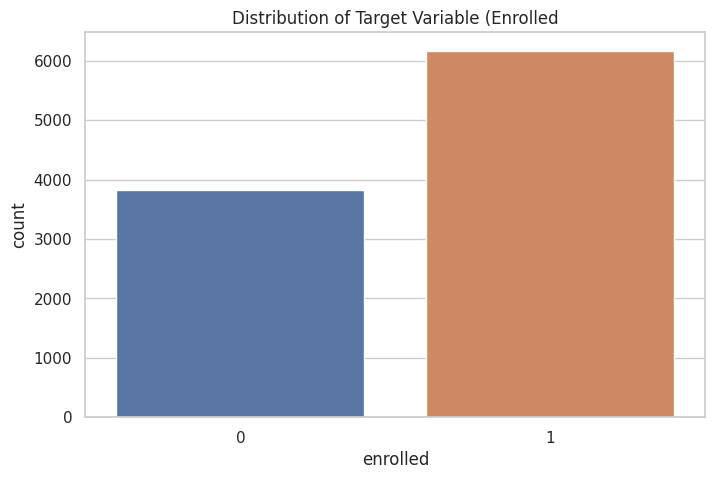

**************************************************

Numerical Variables Distribution


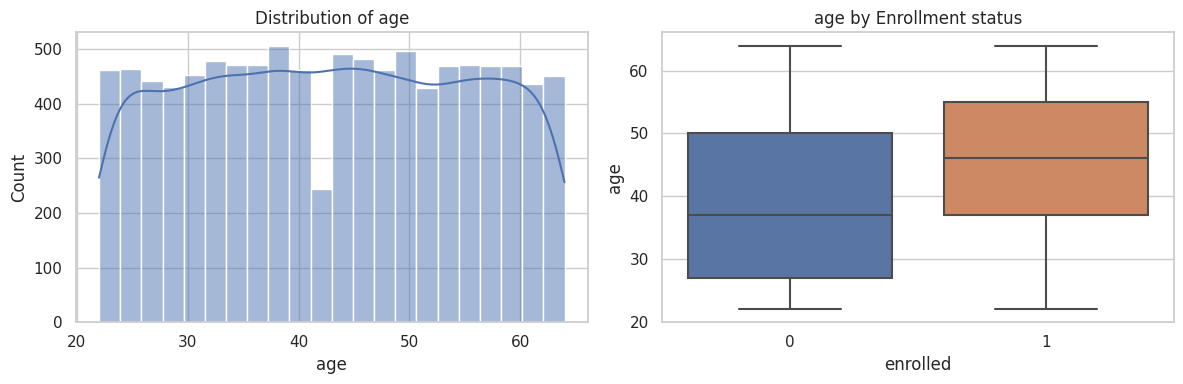

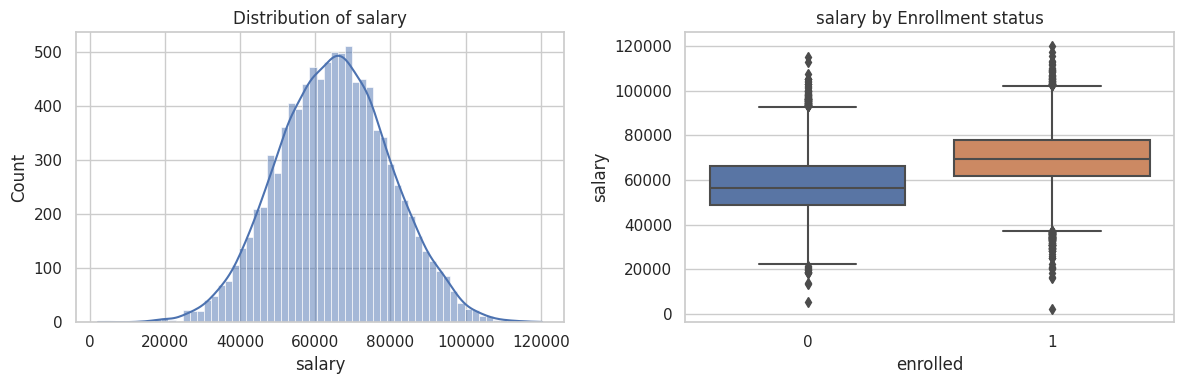

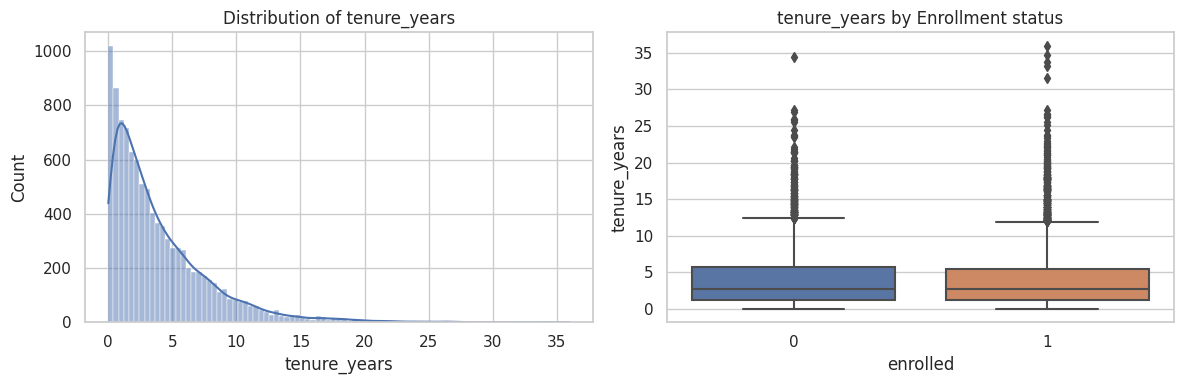

**************************************************
Categorical Variables Distribution


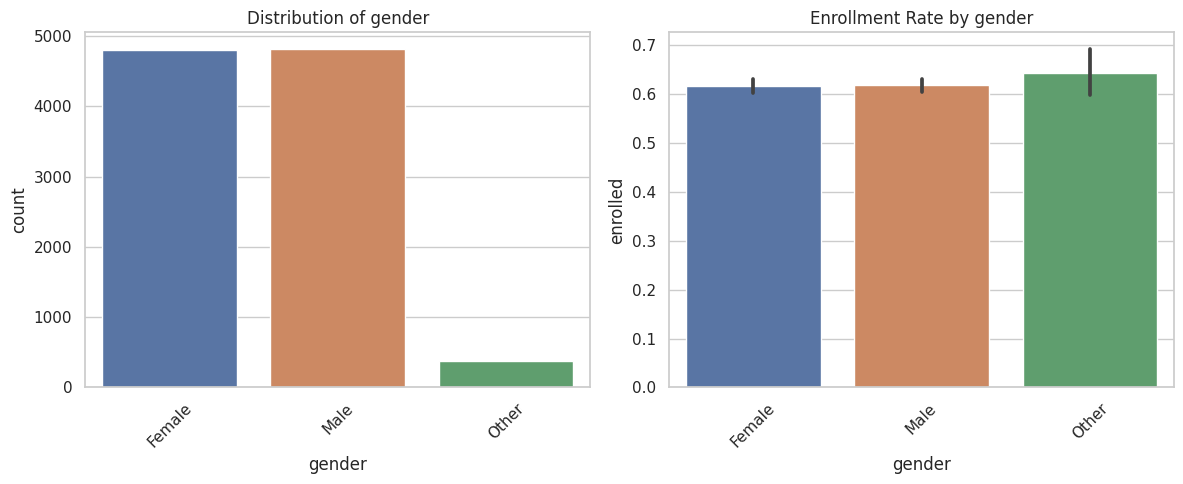

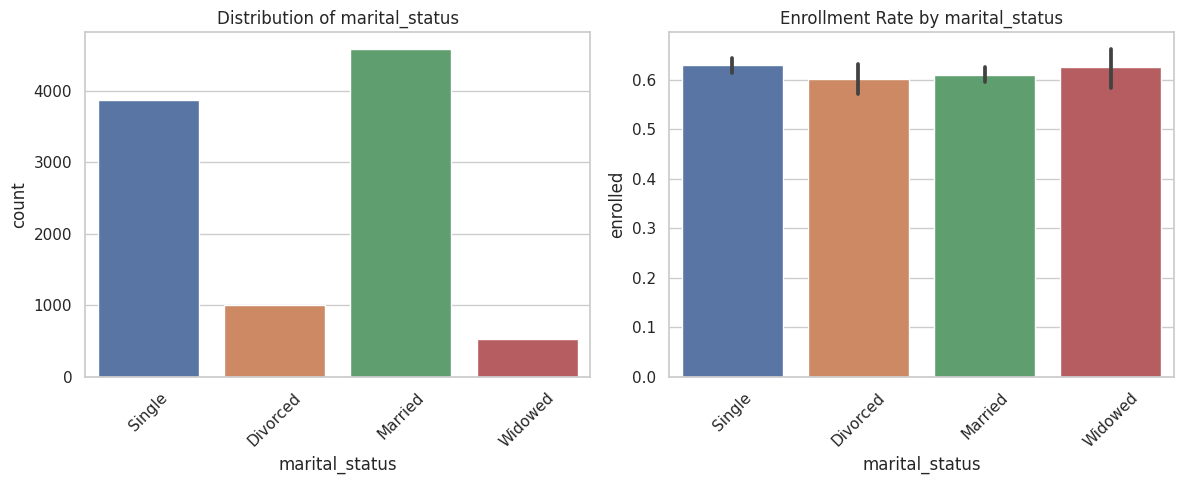

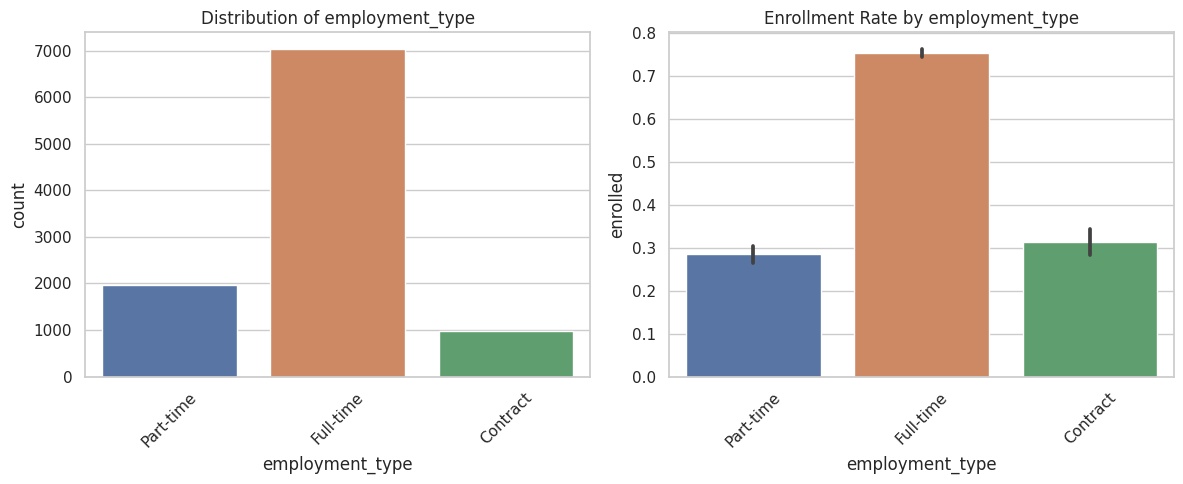

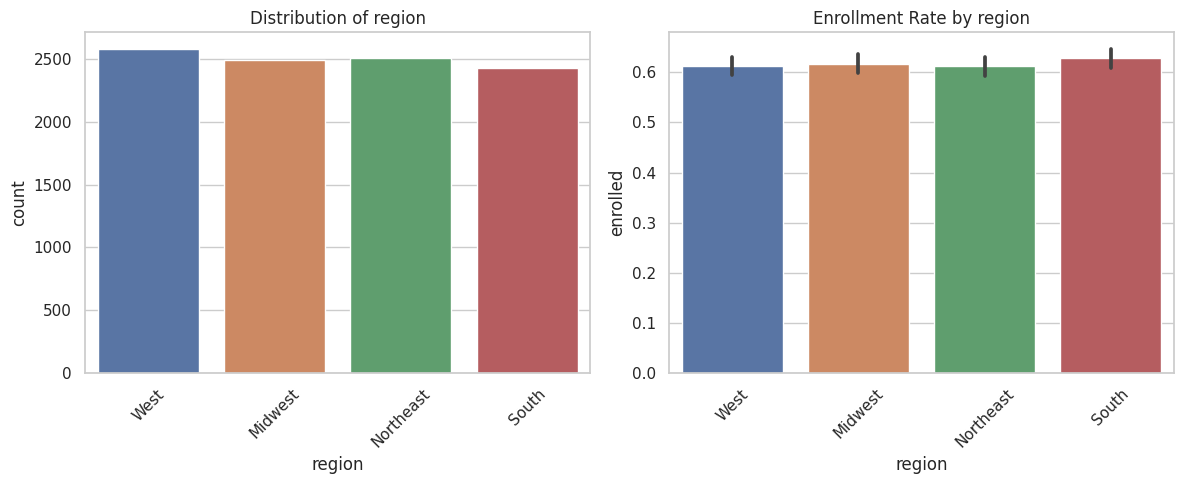

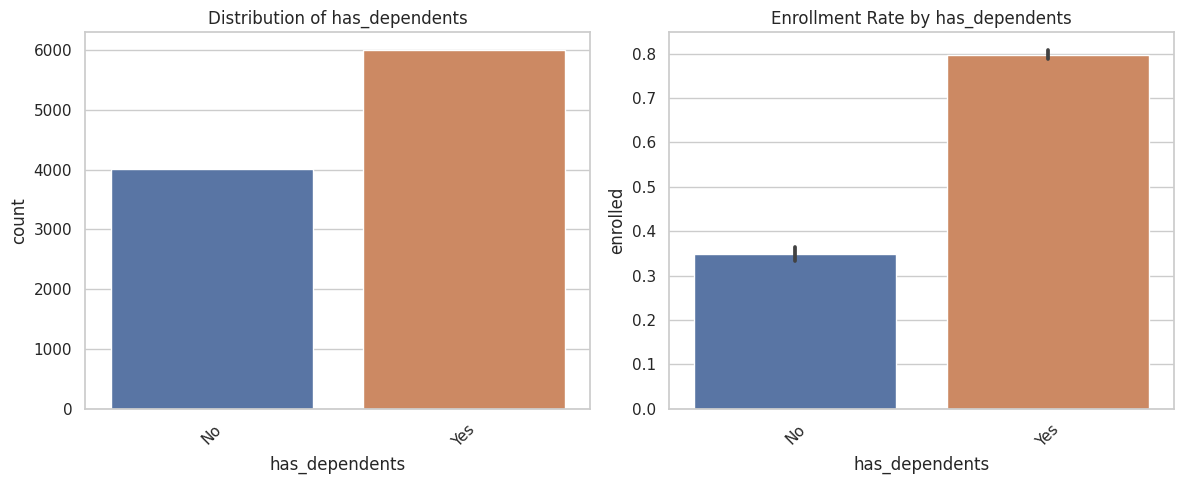

In [30]:
print("\nVisulizations are being generated")
print("-"*80)

print("\nTarget Variable Distribution")
plt.figure(figsize=(8,5))
sns.countplot(x='enrolled', data=emp_df)
plt.title('Distribution of Target Variable (Enrolled')
plt.show()

print("*"*50)

print("\nNumerical Variables Distribution")
num_cols = ['age','salary','tenure_years']
for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(emp_df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1,2,2)
    sns.boxplot(x='enrolled', y=col, data=emp_df)
    plt.title(f'{col} by Enrollment status')

    plt.tight_layout()
    plt.show()

print("*"*50)

print("Categorical Variables Distribution")
for col in ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']:
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=emp_df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='enrolled', data=emp_df)
    plt.title(f'Enrollment Rate by {col}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# 📊 Data Analysis Summary

## 🎯 Target Variable: Enrollment
- **Class Imbalance**: More individuals are enrolled (`1`) than not enrolled (`0`).

---
## 📈 Numerical Features

### 🔹 Age
- **Distribution**: Fairly uniform from 22 to 65.
- **By Enrollment**:
  - Median age is slightly **higher** for enrolled individuals.
 
### 🔹 Salary
- **Distribution**: Roughly normal, centered around 60,000.
- **By Enrollment**:
  - Enrolled individuals generally **earn more**.
 
### 🔹 Tenure Years
- **Distribution**: Right-skewed; peak around 0-2 years.
- **By Enrollment**:
  - Similar medians (~2–3 years).
  - **Outliers**: A significant number of high-tenure outliers (>15 years) in both groups.
 
  
 ---

## 👥 Categorical Features

### 🔹 Gender
- **Distribution**: Balanced between Male and Female; small count in Other.
- **Enrollment Rate**:
  - Fairly even across genders.
  - Slightly higher rate for "Other" (but small sample).

  
### 🔹 Marital Status
- **Distribution**: Mostly Married, then Single.
- **Enrollment Rate**:
  - fairly equal

 
### 🔹 Employment Type
- **Distribution**: Mostly Full-time, then Part-time and Contract.
- **Enrollment Rate**:
  - Full-time workers enroll the most.
  - Part-time employees enroll the least.

  
### 🔹 Region
- **Distribution**: Even across all regions (North, Midwest, Northeast, South).
- **Enrollment Rate**:
  - Small differences, with Northeast and South slightly higher otherwise fairly equal
 

 
### 🔹 Has Dependents
- **Distribution**: More individuals **have dependents** than not.
- **Enrollment Rate**:
  - Those with dependents are **significantly more likely** to enroll.


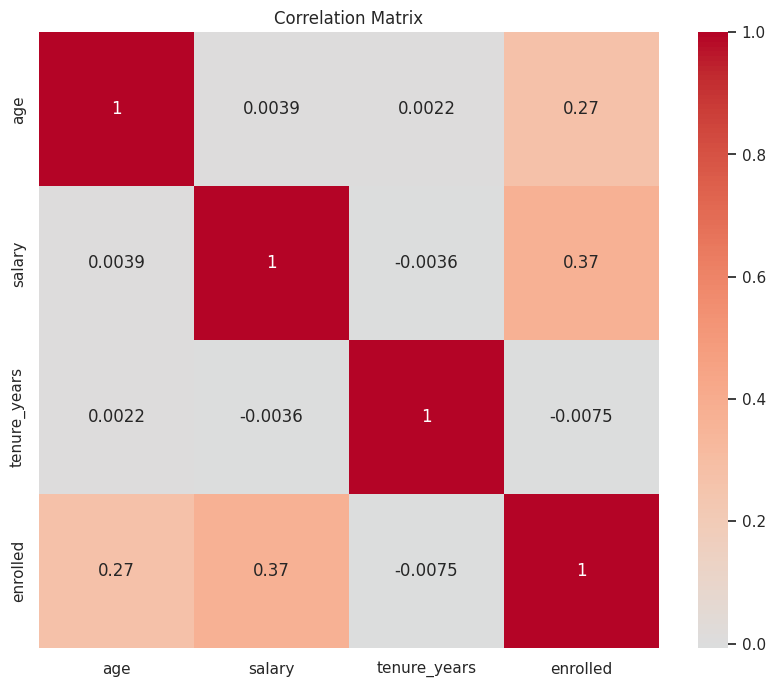

In [31]:
#Correlation Analysis
plt.figure(figsize=(10, 8))
corr = emp_df[['age', 'salary', 'tenure_years', 'enrolled']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.savefig("corr.png")
plt.show()


## 📊 Correlation Matrix Analysis

### 🔍 Key Observations

| Feature Pair               | Correlation | Interpretation                                                                 |
|----------------------------|-------------|--------------------------------------------------------------------------------|
| `enrolled` vs `salary`     | **0.37**    | Moderate positive correlation — higher salary tends to increase enrollment.   |
| `enrolled` vs `age`        | **0.27**    | Weak positive correlation — older individuals are slightly more likely to enroll. |
| `enrolled` vs `tenure_years` | **-0.0075** | No significant linear relationship — tenure is not predictive as-is.           |
| `age` vs `salary`          | **0.0039**  | No meaningful relationship — age and salary are mostly independent.            |

---

### ⚠️ Notes
- This matrix includes **only numerical features**.
- Categorical variables like `gender`, `has_dependents`, etc., **do show trends** in earlier visualizations and should not be ignored in modeling.
- `tenure_years` is **highly skewed**, and its low correlation may improve after transformation (e.g., binning or log-transform).

---

### ✅ Modeling Implications

- Use `salary` and `age` as useful numerical predictors.
- Consider **log-transforming or binning `tenure_years` and `salary (might be done if outlier impacting model performance)`** due to its skewness.
- Include categorical variables via encoding — they have shown visual importance (e.g., `employment_type`, `has_dependents`).


In [32]:
from scipy.stats import chi2_contingency

def chi_square_p_values(X, y):
    p_values = {}
    for col in X.select_dtypes(include=['object', 'category']).columns:
        table = pd.crosstab(X[col], y)
        _, p, _, _ = chi2_contingency(table)
        p_values[col] = p
    return p_values

cat_pvals = chi_square_p_values(X, y)
print(cat_pvals)


{'gender': 0.5886877687128149, 'marital_status': 0.19416178932819117, 'employment_type': 0.0, 'region': 0.614664571718061, 'has_dependents': 0.0}


### P-values from Feature Significance Testing

The following table shows the p-values associated with each feature, indicating their statistical significance in relation to the target variable:

| Feature         | P-value   |
|----------------|-----------|
| Gender          | 0.5887    |
| Marital Status  | 0.1942    |
| Employment Type | 0.0000    |
| Region          | 0.6147    |
| Has Dependents  | 0.0000    |

#### Interpretation:
- Features with **p-values < 0.05** are considered statistically significant.
- In this case, **Employment Type** and **Has Dependents** are significant predictors.
- Other features like **Gender**, **Marital Status**, and **Region** do not show strong evidence of significance.


# Modeling

## ML

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

# ML models

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


#Evaluation Metrics

from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            classification_report)



In [34]:
# Dataset Preparation

df =emp_df.copy()  # keep the original data 


# X = df.drop(['employee_id','enrolled'], axis =1)
X = df.drop(['enrolled'], axis=1)
y = df['enrolled']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [35]:
len(X_train), len(X_test)

(8000, 2000)

In [36]:
# pipelines

numeric_features = ['age','salary']
numeric_features_log = ['tenure_years']
categorical_features=['gender', 'marital_status','employment_type',
                     'region','has_dependents']

#For Numeric Features (No Log)

numeric_transformer = Pipeline(steps=[
    ('scaler',StandardScaler())
])

#For Numeric Features (Log)

log_transformer = Pipeline(steps=[
    ('log',FunctionTransformer(np.log1p)),
    ('scaler',StandardScaler())
])

#For Categorical Features

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])



# Combine Pipelines

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('log_tenure', log_transformer, numeric_features_log),
        ('cat',categorical_transformer, categorical_features)
    ]    
)

# Complete pipeline

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [37]:
#Define parameters grid for tuning

param_grid = [{
    'classifier': [RandomForestClassifier(random_state=42)],
    'classifier__n_estimators':[100],
    'classifier__max_depth':[None,5,10]
},
{
    'classifier': [LogisticRegression(max_iter=1000, random_state=42)],
    'classifier__C': [0.1,1,10],
             }
            ]

In [38]:
# Create and fit GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                          scoring='roc_auc',n_jobs=-1, verbose=1)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'salary']),
                                                                        ('log_tenure',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['tenure_years']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unkno...
                                                                          'has_dependents'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(max_depth=5,
                                                                random_state=42)],
                          'classifier__max_depth': [None, 5, 10],
                          'classifier__n_estimators': [100]},
                         {'classifier': [LogisticRegression(max_iter=1000,
                                                            random_state=42)],
                          'classifier__C': [0.1, 1, 10]}],
             scoring='roc_auc', verbose=1)

In [39]:
#Best Model

best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (AUC): {grid_search.best_score_:.3f}")

Best parameters: {'classifier': RandomForestClassifier(max_depth=5, random_state=42), 'classifier__max_depth': 5, 'classifier__n_estimators': 100}
Best cross-validation score (AUC): 1.000


In [40]:
# Evaluate on test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [41]:
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.3f}")


Test Set Performance:
Accuracy: 0.999
Precision: 0.998
Recall: 1.000
F1 Score: 0.999
ROC AUC: 1.000


In [50]:
# Extract preprocessing step
preprocessor = best_model.named_steps['preprocessing']

# Numeric + categorical column names (these are your input names)
num_features = ['age', 'salary', 'tenure_years']
cat_features = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']

# Get OHE feature names
ohe = preprocessor.named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(cat_features)

# Combine all final feature names
final_feature_names = num_features + list(ohe_feature_names)


In [54]:
print(grid_search.best_estimator_)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'salary']),
                                                 ('log_tenure',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure_years']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                         

In [57]:
#  Get the best fitted pipeline from GridSearchCV
best_model = grid_search.best_estimator_

# Access the fitted RandomForest model
rf_model = best_model.named_steps['classifier'] 

# Get feature names after preprocessing
preprocessor = best_model.named_steps['preprocessing']

# Original features used
numeric_features = ['age','salary']
numeric_features_log = ['tenure_years']
categorical_features=['gender', 'marital_status','employment_type',
                     'region','has_dependents']


num_features = ['age', 'salary']
log_feature = ['tenure_years']
cat_features = ['gender', 'marital_status', 'employment_type', 'region', 'has_dependents']

# Get transformed categorical feature names
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Final ordered feature names
final_feature_names = numeric_features + numeric_features_log + list(ohe_feature_names)

# Get feature importances
importances = rf_model.feature_importances_

#  Build a DataFrame for readability
import pandas as pd
feat_importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance_df

,Feature,Importance
1,salary,0.241342
11,employment_type_Full-time,0.186322
17,has_dependents_No,0.167838
18,has_dependents_Yes,0.154234
0,age,0.150919
12,employment_type_Part-time,0.068134
10,employment_type_Contract,0.024727
2,tenure_years,0.003304
14,region_Northeast,0.000472
6,marital_status_Divorced,0.000350


### 🔍 Feature Importance Analysis (Random Forest)

After training the model and extracting feature importances from the best `RandomForestClassifier`, we analyzed which features contributed most to predicting insurance enrollment.

---

#### 🔝 Top Predictive Features

| Feature                     | Importance | Interpretation                                                                 |
|----------------------------|------------|---------------------------------------------------------------------------------|
| `salary`                   | **0.241**  | The most predictive feature. Higher salary strongly correlates with enrollment. |
| `employment_type_Full-time`| **0.186**  | Full-time employees are much more likely to enroll in the insurance program.   |
| `has_dependents_No`        | **0.168**  | Employees without dependents tend to enroll less.                              |
| `has_dependents_Yes`       | **0.154**  | Having dependents is a strong signal for opting in.                            |
| `age`                      | **0.151**  | Older individuals are slightly more likely to enroll, possibly due to planning. |

---

#### 🧐 Moderately Predictive

| Feature                     | Importance |
|----------------------------|------------|
| `employment_type_Part-time`| 0.068      |
| `employment_type_Contract` | 0.025      |

*Part-time and contract workers show lower engagement, likely due to less job security or fewer benefits.*

---

#### 🪂 Low Predictive Power

| Feature Group              | Features                          | Importance Range |
|---------------------------|-----------------------------------|------------------|
| `tenure_years`            | `tenure_years`                    | ~0.003           |
| `region`                | Northeast, Midwest, South, West   | < 0.001          |
| `gender`                | Male, Female, Other               | < 0.001          |
| `marital_status`        | Single, Married, Divorced, etc.   | < 0.001          |

> These features contribute very little to prediction performance. Their signal is either weak or redundant given more powerful predictors like employment type and dependents.

---

### 🧠 Summary Insights

- The model relies most heavily on **salary**, **employment type**, **has_dependents**, and **age**.
- Features such as **gender**, **region**, and **marital status** are not important for prediction, aligning with earlier **p-value** significance tests.
- **`tenure_years`** had minimal impact, despite being numeric — likely due to its skewed distribution and poor correlation.



In [42]:
# save the model

import joblib

joblib.dump(best_model, 'enrollment_model_.joblib')

['enrollment_model_.joblib']

## ✅ Model Evaluation on Test Set

After performing hyperparameter tuning using `GridSearchCV`, the model was evaluated on the hold-out test set. Below are the performance metrics:

| **Metric**      | **Score** |
|-----------------|-----------|
| 📊 **Accuracy**    | `0.999`     |
| 🎯 **Precision**   | `0.998`     |
| 🔁 **Recall**      | `1.000`     |
| 📌 **F1 Score**    | `0.999`     |
| 📈 **ROC AUC**     | `1.000`     |

---

### 🧠 Insights:

- **High Accuracy & F1 Score** indicate the model is performing exceptionally well on both classes.
- **Recall = 1.000** means the model identifies all employees who enrolled.
- **Precision = 0.998** shows it rarely misclassifies a non-enrolled employee as enrolled.
- **Perfect ROC AUC** suggests excellent separability between the classes.

### 🧠 Why ROC AUC = 1.0 is (My Opinion)

Although a perfect AUC often raises concerns of overfitting, in this case, it can be **rationally explained** based on:


1. **Strongly Predictive Features**:  
   Features like `employment_type`, `has_dependents`, and `salary` show clear patterns that separate enrolled vs. non-enrolled employees. For example:
   - Full-time employees and those with dependents are significantly more likely to enroll.
   - Part-time/contract employees and those without dependents are less likely.

2. **Good Preprocessing Strategy**:  
   - Numeric features were appropriately scaled.
   - Log transformation was used for skewed variables like `tenure_years`.
   - One-hot encoding handled categorical variables cleanly, preserving signal.

3. **No Data Leakage**:  
   - `employee_id` was dropped.
   - The target (`enrolled`) was not included in feature engineering.
   - Pipelines ensured no target information leaked during preprocessing.

4. **Test Set is Large Enough**:  
   - The test set had **2,000 rows** (20% of the 10,000 dataset), which reduces the chance of performance spikes due to small sample size.

In [ ]:
# Take only those 4 features



# Deep Learning (MLP)

In [43]:
# Important libraries for DL

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader
import torch.nn.functional as F
from tqdm import tqdm

In [23]:
#fit and transform training and testing data
X_train_processed = preprocessing.fit_transform(X_train)
X_test_processed = preprocessing.transform(X_test)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [24]:
y_train

array([1, 1, 1, ..., 0, 1, 0])

In [25]:
# Create Pytorch Dataset

class enrollmentDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.y)

    def __getitem__(self,index):
        return torch.tensor(self.X[index], dtype= torch.float32), torch.tensor(self.y[index], dtype= torch.float32)


train_dataset = enrollmentDataset(X_train_processed, y_train)
val_dataset = enrollmentDataset(X_test_processed, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)
val_dataloader= DataLoader(val_dataset,batch_size=32)

In [26]:
i,l = next(iter(train_dataloader))

In [27]:
i.shape, l.shape

(torch.Size([32, 19]), torch.Size([32]))

In [28]:
i.dtype

torch.float32

In [29]:
#create a model

class enrollmentModel(nn.Module):
    def __init__(self,input_dim):
        super(enrollmentModel,self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64,32)
        self.out = nn.Linear(32,1)

    def forward(self,x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.out(x)

        return x

model = enrollmentModel(X_train_processed.shape[1])

In [30]:
model

enrollmentModel(
  (fc1): Linear(in_features=19, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [31]:
p = model(i)

In [32]:
p.shape

torch.Size([32, 1])

In [33]:
import wandb

In [35]:
wandb.login(key='a710023e8d1123ce33b87e258ad5657c1fda37e5')

wandb: Currently logged in as: as16rana (windrunner_1510). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [36]:
wandb.init(project="employee-enrollment", name="baseline-run")

In [40]:
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [49]:
def train_model(model,train_loader,epochs,val_loader=None):
    for epoch in range(epochs):
        print(f"\nStarting Epoch: {epoch + 1}")
        model.train()
        
        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, targets in train_loader:
            inputs = inputs.float()
            targets = targets.float()

            optimizer.zero_grad()
            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, targets)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
            with torch.no_grad():
                predictions = torch.sigmoid(outputs) > 0.5
                correct += (predictions == targets.bool()).sum().item()
                total += targets.size(0)

        avg_loss = running_loss / len(train_loader)
        accuracy = correct / total if total > 0 else 0
        print(f"Epoch {epoch+1} Summary - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

        # Evaluate on validation set
        if val_loader:
            val_loss, val_acc = evaluate_model(model, val_loader)
            print(f"Validation - Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

# Evaluation function
def evaluate_model(model, dataloader):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, targets in dataloader:
            inputs = inputs.float()
            targets = targets.float()

            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

            predictions = torch.sigmoid(outputs) > 0.5
            correct += (predictions == targets.bool()).sum().item()
            total += targets.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total if total > 0 else 0
    return avg_loss, accuracy


In [53]:
train_model(model, train_dataloader, 100, val_dataloader)


Starting Epoch: 1
Epoch 1 Summary - Loss: 0.0311, Accuracy: 0.9882
Validation - Loss: 0.0286, Accuracy: 0.9925

Starting Epoch: 2
Epoch 2 Summary - Loss: 0.0287, Accuracy: 0.9888
Validation - Loss: 0.0302, Accuracy: 0.9835

Starting Epoch: 3
Epoch 3 Summary - Loss: 0.0272, Accuracy: 0.9902
Validation - Loss: 0.0338, Accuracy: 0.9865

Starting Epoch: 4
Epoch 4 Summary - Loss: 0.0258, Accuracy: 0.9906
Validation - Loss: 0.0276, Accuracy: 0.9870

Starting Epoch: 5
Epoch 5 Summary - Loss: 0.0244, Accuracy: 0.9922
Validation - Loss: 0.0266, Accuracy: 0.9905

Starting Epoch: 6
Epoch 6 Summary - Loss: 0.0253, Accuracy: 0.9902
Validation - Loss: 0.0248, Accuracy: 0.9900

Starting Epoch: 7
Epoch 7 Summary - Loss: 0.0230, Accuracy: 0.9901
Validation - Loss: 0.0218, Accuracy: 0.9925

Starting Epoch: 8
Epoch 8 Summary - Loss: 0.0233, Accuracy: 0.9911
Validation - Loss: 0.0313, Accuracy: 0.9845

Starting Epoch: 9
Epoch 9 Summary - Loss: 0.0219, Accuracy: 0.9915
Validation - Loss: 0.0252, Accuracy:

# USER INTERFACE (By Gradio) 

In [46]:
# !pip install gradio

In [62]:
emp_df.columns

Index(['employee_id', 'age', 'gender', 'marital_status', 'salary',
       'employment_type', 'region', 'has_dependents', 'tenure_years',
       'enrolled'],
      dtype='object')

In [58]:
# unique values

for col in categorical_features:
    print(f'{col} : {emp_df[col].unique()}')
    print("-"*50)

gender : ['Female' 'Male' 'Other']
--------------------------------------------------
marital_status : ['Single' 'Divorced' 'Married' 'Widowed']
--------------------------------------------------
employment_type : ['Part-time' 'Full-time' 'Contract']
--------------------------------------------------
region : ['West' 'Midwest' 'Northeast' 'South']
--------------------------------------------------
has_dependents : ['No' 'Yes']
--------------------------------------------------


In [48]:
import gradio as gr

# Load model and preprocessor
model = joblib.load(f"{config['MODEL_PATH']}/enrollment_model_.joblib")

def predict(employee_id, age, gender, marital_status, salary, 
            employment_type, region, has_dependents, tenure_years):
    
    input_dict = {
        'employee_id': employee_id, 
        'age': age,
        'gender': gender,
        'marital_status': marital_status,
        'salary': salary,
        'employment_type': employment_type,
        'region': region,
        'has_dependents': has_dependents,
        'tenure_years': tenure_years
    }
    
    df = pd.DataFrame([input_dict])
    
    # Directly using model if it's the pipeline (with preprocessor inside)
    pred = model.predict(df)
    return "✅ Enrolled" if pred[0] == 1 else "❌ Not Enrolled"

# Gradio interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Number(label='Employee Id'),
        gr.Number(label='Age'),
        gr.Dropdown(['Female', 'Male', 'Other'], label='Gender'),
        gr.Dropdown(['Single', 'Divorced', 'Married', 'Widowed'], label='Marital Status'),
        gr.Number(label='Salary'),
        gr.Dropdown(['Part-time', 'Full-time', 'Contract'], label="Employment Type"),
        gr.Dropdown(['West', 'Midwest', 'Northeast', 'South'], label='Region'),
        gr.Dropdown(['No', 'Yes'], label='Has Dependents'),
        gr.Number(label='Tenure Years')
    ],
    outputs="text",
    title="Voluntary Insurance Enrollment Predictor"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7860
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://be47c48417eb141b82.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
